# Import

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import plotly.express as px
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load Data

In [6]:
train_df = pd.read_json('../data/train.json')
test_df = pd.read_json('../data/test.json')

#### train data : 14,271 rows x 23 columns including `price`

In [3]:
train_df

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,100.584850,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",NaN,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,100.566949,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",NaN,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,100.565660,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",NaN,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,NaN,3.0,3.0,170,...,100.428438,0,None,NaN,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,NaN,3.0,2.0,120,...,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",NaN,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14266,10738911,Nonthaburi,Mueang Nonthaburi,Bang Kraso,36/2 รัตนาธิเบศร์,Condo,648.0,2.0,1.0,58,...,100.504931,2,"[[PP10 Bang Krasor MRT, 90], [PP11 Nonthaburi ...",NaN,14.0,11,2015,August,"[Covered car park, Lounge, 24 hours security, ...",4000000
14267,11031178,Nonthaburi,Bang Bua Thong,Phimon Rat,Phimonrat,Townhouse,NaN,3.0,2.0,85,...,100.359562,0,None,NaN,4.0,3,0,None,[],1790000
14268,10945909,Bangkok,Saphan Sung,Saphan Sung,Soi Ramkhamhaeng 164,Detached House,300.0,3.0,3.0,170,...,100.712196,0,None,20.0,11.0,5,0,None,"[Clubhouse, Community Garden, CCTV, 24 hours s...",4550000
14269,10768246,Bangkok,Don Mueang,Sanam Bin,วิภาวดีรังสิต,Townhouse,NaN,2.0,2.0,150,...,100.573063,0,None,NaN,10.0,8,0,None,[Covered car park],1950000


#### test data : 2,500 rows x 22 columns w/o `price`

In [4]:
test_df

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,13.614196,100.680610,0,None,NaN,9.0,5,0,None,"[Clubhouse, Community Garden, CCTV, Pavillion,..."
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,13.702222,100.341833,0,None,20.0,9.0,5,2020,None,"[Car Park, Clubhouse, Community Garden, CCTV, ..."
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,13.755713,100.566385,3,"[[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780...",NaN,13.0,20,2015,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,13.724295,100.577202,1,"[[E6 Thong Lo BTS, 70]]",20.0,16.0,20,2013,June,"[Car Park, Covered car park, CCTV, Fitness cor..."
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,13.855437,100.547923,0,None,20.0,10.0,14,2012,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,10889363,Bangkok,Bang Rak,Maha Phruettharam,660-662 Rama 4 Road,Condo,1598.0,1.0,1.0,33,...,13.733237,100.526269,2,"[[BL27 Sam Yan MRT, 410], [S2 Sala Daeng BTS, ...",NaN,18.0,20,2016,September,"[Amphitheatre, Covered car park, Community Gar..."
2496,10975839,Bangkok,Sathon,Thung Maha Mek,88 Narathiwatratchanakharin Road,Condo,493.0,1.0,1.0,65,...,13.719377,100.531092,3,"[[B1 Sathorn BRT, 180], [B2 Arkan Songkhro BRT...",20.0,20.0,20,2009,July,"[Covered car park, CCTV, Fitness corner, Sauna..."
2497,10986832,Bangkok,Bang Phlat,Bang Yi Khan,"1521 Soi Arun Amarin 53, Arun Amarin Road",Condo,1121.0,1.0,1.0,42,...,13.772913,100.492732,1,"[[BL05 Bang Yi Khan MRT, 910]]",NaN,5.0,7,2009,January,"[Car Park, Community Garden, CCTV, Fitness cor..."
2498,10687627,Samut Prakan,Mueang Samut Prakan,Samrong Nuea,Thang Rotfai Sai Kao Road,Condo,719.0,1.0,1.0,28,...,13.653037,100.592954,1,"[[E15 Samrong BTS, 800]]",19.0,13.0,20,2016,December,"[Covered car park, CCTV, Fitness corner, 24 ho..."


# EDA examples

#### target value : `price`

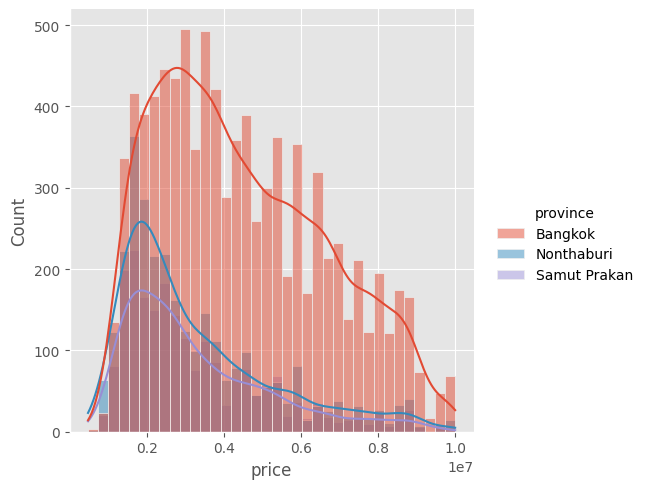

In [5]:
sns.displot(x="price", hue='province', kde=True, data=train_df);

#### missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       14271 non-null  int64  
 1   province                 14271 non-null  object 
 2   district                 14271 non-null  object 
 3   subdistrict              14260 non-null  object 
 4   address                  14271 non-null  object 
 5   property_type            14271 non-null  object 
 6   total_units              10509 non-null  float64
 7   bedrooms                 14228 non-null  float64
 8   baths                    14236 non-null  float64
 9   floor_area               14271 non-null  int64  
 10  floor_level              8093 non-null   float64
 11  land_area                4917 non-null   float64
 12  latitude                 14271 non-null  float64
 13  longitude                14271 non-null  float64
 14  nearby_stations       

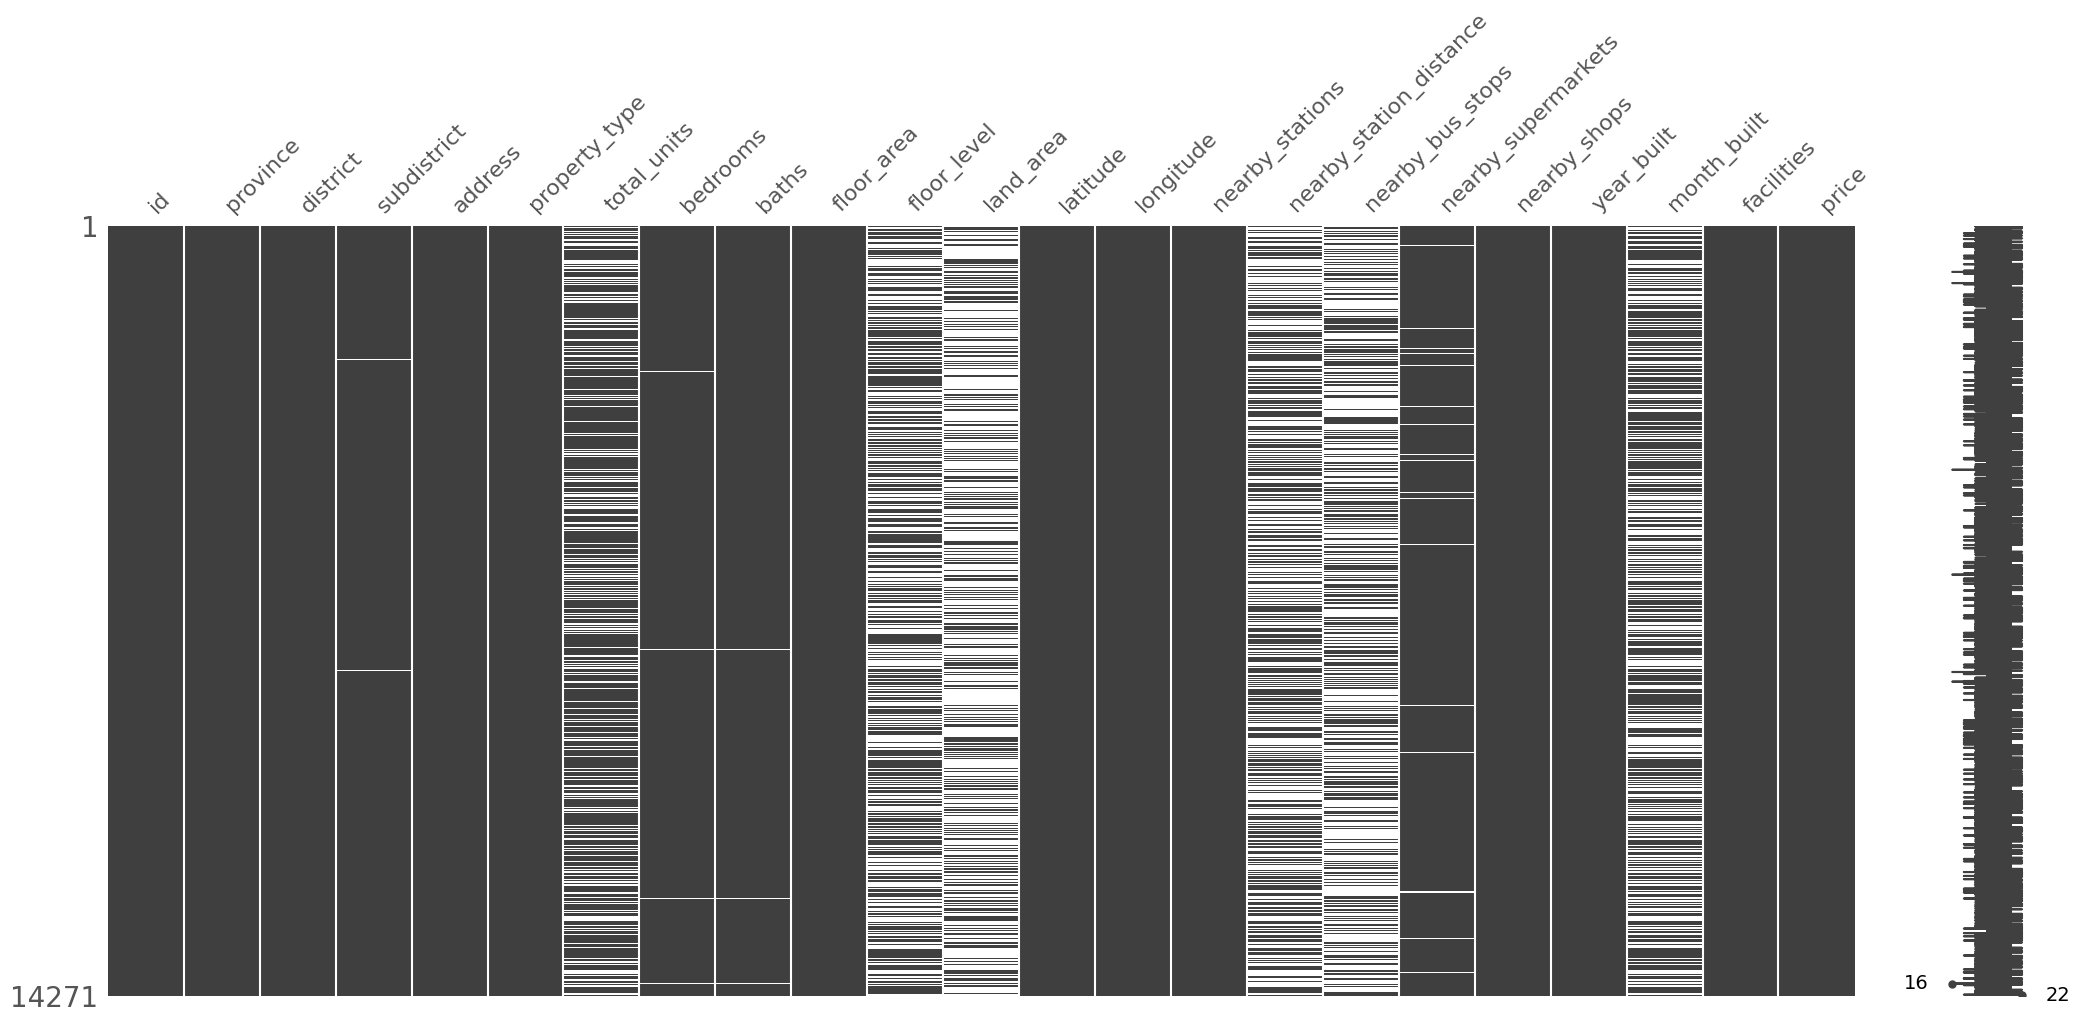

In [6]:
train_df.info()
msno.matrix(train_df);

#### `property_type` and `province`

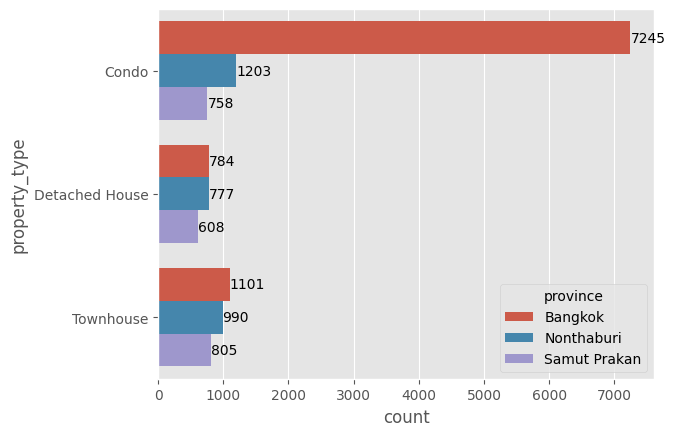

In [7]:
ax = sns.countplot(y='property_type', hue="province", data=train_df)
for i in range(3):
    ax.bar_label(ax.containers[i])

#### scatter plot

<AxesSubplot:xlabel='floor_area', ylabel='price'>

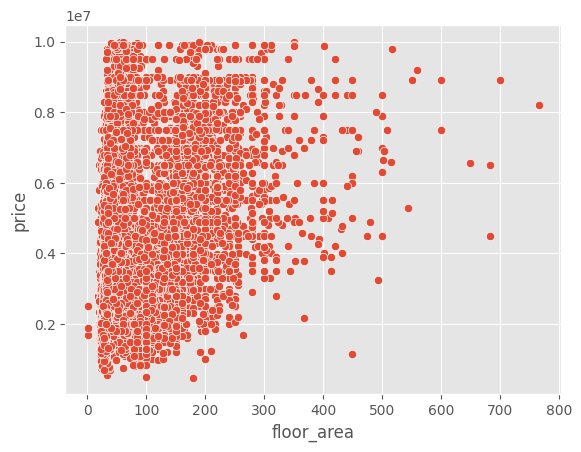

In [8]:
sns.scatterplot(x='floor_area', y='price', data=train_df)

#### facilities

In [9]:
from collections import Counter

facility_count = Counter()
for f in train_df.facilities:
    facility_count.update(f)

facility_count.most_common(10)

[('24 hours security', 11675),
 ('CCTV', 10504),
 ('Swimming pool', 9993),
 ('Fitness corner', 9148),
 ('Covered car park', 6182),
 ('Car Park', 5533),
 ('Community Garden', 3528),
 ('Lift lobby', 3195),
 ('Gymnasium room', 2661),
 ('Clubhouse', 2492)]

#### map

In [10]:
fig = px.scatter_mapbox(
    data_frame=train_df,
    lat="latitude",
    lon="longitude",
    hover_data=["id", "price"],
    color="province",
    size="price",
    zoom=10,
    height=1000,
    width=1000)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

# Modelling

#### feature selection

In [11]:
feat_num = ['floor_area', 'nearby_shops']
feat_cat = ['property_type']

train_df[feat_num + feat_cat].info() # check non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   floor_area     14271 non-null  int64 
 1   nearby_shops   14271 non-null  int64 
 2   property_type  14271 non-null  object
dtypes: int64(2), object(1)
memory usage: 334.6+ KB


#### train - dev split

In [12]:
X = pd.get_dummies(train_df[feat_num + feat_cat], columns=feat_cat, drop_first=True)
y = train_df['price']

X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size=0.8, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_dev.shape)
print(y_dev.shape)

(11416, 4)
(11416,)
(2855, 4)
(2855,)


In [13]:
X_train.head()

,floor_area,nearby_shops,property_type_Detached House,property_type_Townhouse
7877,180,6,0,1
14217,200,4,1,0
819,38,20,0,0
5620,26,9,0,0
9357,29,11,0,0


#### Dummy Regressor

In [14]:
model_dummy = DummyRegressor(strategy='mean')
model_dummy.fit(X_train, y_train)

pred_train = model_dummy.predict(X_train)
pred_dev = model_dummy.predict(X_dev)

print("R2 Score of train :",  r2_score(y_train, pred_train))
print("R2 Score of dev   :",  r2_score(y_dev, pred_dev))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train, squared=False))
print("RMSE of test  :", mean_squared_error(y_dev, pred_dev, squared=False))

R2 Score of train : 0.0
R2 Score of dev   : -3.3482519945060574e-05

RMSE of train : 2174096.9819173277
RMSE of test  : 2202624.0620380994


#### residual plot

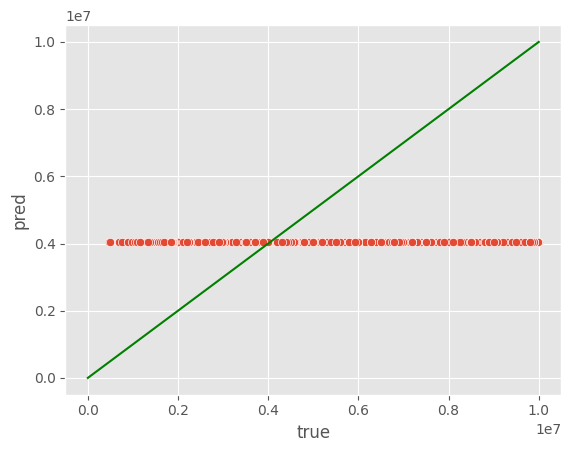

In [15]:
df_result = pd.DataFrame({'true':y_train, 'pred':pred_train})
df_result['residual'] = df_result['pred'] - df_result['true']

sns.scatterplot(y='pred', x='true', data=df_result)
plt.plot(np.linspace(0, 1e7, 100), np.linspace(0, 1e7, 100), color='green');

#### Simple Linear Regressor

In [16]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

pred_train = model_lr.predict(X_train)
pred_dev = model_lr.predict(X_dev)

print("R2 Score of train :",  r2_score(y_train, pred_train))
print("R2 Score of dev   :",  r2_score(y_dev, pred_dev))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train, squared=False))
print("RMSE of test  :", mean_squared_error(y_dev, pred_dev, squared=False))

R2 Score of train : 0.34484703239742154
R2 Score of dev   : 0.37214957655326797

RMSE of train : 1759747.145602314
RMSE of test  : 1745264.2974368618


#### residual plot

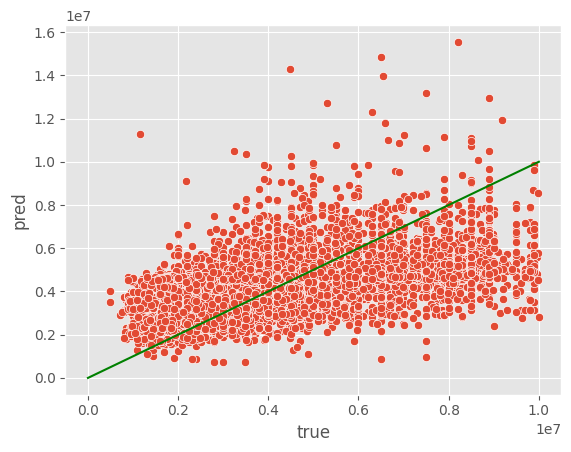

In [17]:
df_result = pd.DataFrame({'true':y_train, 'pred':pred_train})
df_result['residual'] = df_result['pred'] - df_result['true']

sns.scatterplot(y='pred', x='true', data=df_result)
plt.plot(np.linspace(0, 1e7, 100), np.linspace(0, 1e7, 100), color='green');

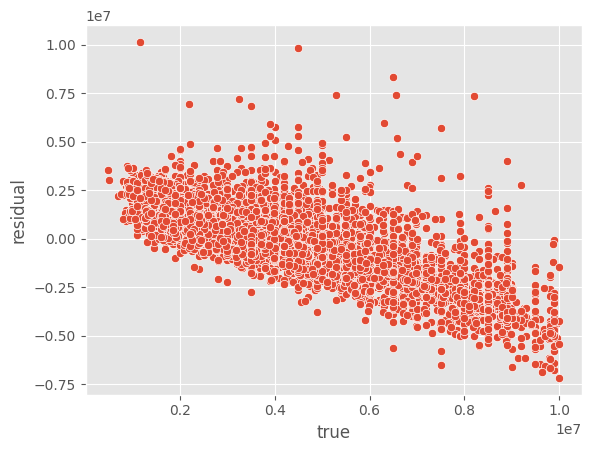

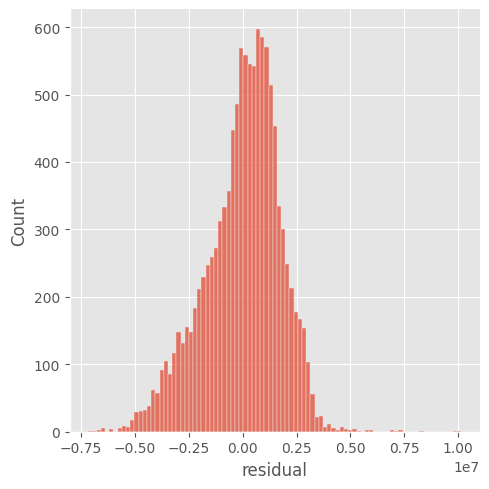

In [18]:
sns.scatterplot(x='true', y='residual', data=df_result)
sns.displot(x='residual', data=df_result);

# How to submit

- preprocess test data in the same way as train data
- after that, predict `price` and create `submission.csv`
- `submission.csv` must have 2 columns: `id` and `price`
- **NEVER** drop any row in the test data

In [19]:
# test data has id and features, but does not have price
test_df.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,13.614196,100.680610,0,None,NaN,9.0,5,0,None,"[Clubhouse, Community Garden, CCTV, Pavillion,..."
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,13.702222,100.341833,0,None,20.0,9.0,5,2020,None,"[Car Park, Clubhouse, Community Garden, CCTV, ..."
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,13.755713,100.566385,3,"[[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780...",NaN,13.0,20,2015,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,13.724295,100.577202,1,"[[E6 Thong Lo BTS, 70]]",20.0,16.0,20,2013,June,"[Car Park, Covered car park, CCTV, Fitness cor..."
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,13.855437,100.547923,0,None,20.0,10.0,14,2012,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."


In [20]:
# preprocessing
X_test = pd.get_dummies(test_df[feat_num + feat_cat], columns=feat_cat, drop_first=True)

print(X_test.shape)

(2500, 4)


In [21]:
# prediction
pred_test = model_dummy.predict(X_test)
pred_test[:10]

array([4041574.1923616, 4041574.1923616, 4041574.1923616, 4041574.1923616,
       4041574.1923616, 4041574.1923616, 4041574.1923616, 4041574.1923616,
       4041574.1923616, 4041574.1923616])

In [22]:
# save as csv file
test_df['price'] = pred_test
test_df[['id','price']].to_csv('submission.csv', index=False)